# Intro to Data Science Workflow

There is no standardised approach to solving problems, each problem posed will require various strategies and differing tools to yield a solution that offers some value. There is however a general framework from which to work within. We discussed this framework in the slides prior to the break.

Data science framework.

 - Identify the problem - ask the right question.
 - Source the data
 - Explore/Clean/Wrangle the data
 - Build Model
 - Evaluate Model
 - Communicate Results

This process is highly iterative and often involves as many backward steps as it involves forward. Through investigating the data you have sourced you may begin to ask new questions which then require further investigation and so on.

**Identify the problem**

In this notebook we are going to tackle the hyperbole claims made by the British media in summer 2018 that there is no safe level of alcohol that can be consumed without increasing your relative risk of obtaining an adverse health condition. We want to verify the veracity of this claim and understand what the initial researchers concluded prior to the information being presented to the media.


**Source the data**

In this case the data used in the intial research has been made available for our analysis. This means we can access for ourselves how worried we need to be about our alcohol related vices.

The data has been presented in csv files, a common form of data file format. Data may be sourced from various file formats or different database structures in business. Most common are SQL relational databases or flat file formats such as csv files. We may occassionally need to scrape data from the web or quite recently I have had to tackle nearly 100gb of binary files - very frustrating.

You'll need to think about whether you have enough data available, and whether the data is relevant to the research question.

It's also important to identify the assumptions and limitations of the data you're working with, check the veracity of the source of your data, sometimes the intent of values differs from your assumed interpretations. This is especially true of missing or null value data.

**Tools**

In this notebook we will use a few common data science python libraries:
 - Pandas: excellent for exploring tabular data
 - Numpy: Low level python library used for high volume calculations
 - Matplotlib: Graphing library
 - Scipy: Statistical library

# The Risks of Alcohol

#### No Safe Level Of Alcohol

In August 2018 media outlets across the country announced the findings of a Lancet publication that revealed there is no safe level of alcohol consumption. Contrary to that healthy glass of red wine per day we are now led to believe that consuming any alcohol will increase our risk of an adverse health condition compared with zero consumption.

Just how exaggerated was the media response to this press release? How can scientific investigation of the data help us understand our risk of alcohol consumption.

Fortunately for us, David Spiegelhalter helped answer these questions in a Medium post; https://medium.com/wintoncentre/the-risks-of-alcohol-again-2ae8cb006a4a

We can replicate his work to show how the data science methodology and rigorous data analysis helps us to better understand risk and therefore make more informed decisions.

### Imports & Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the data
df = pd.read_csv('data/tmrel.csv')

In [3]:
# Filter dataframe for gram amounts divisble by 10
div_by_10 = df[df.grams_per_day.mod(10) == 0].reset_index(drop=True)

### View the table

In [4]:
div_by_10

,grams_per_day,mean_all_cause_rr,lower_all_cause_rr,upper_all_cause_rr
0,0,1.000000,1.000000,1.000000
1,10,1.005688,0.975214,1.039147
2,20,1.071426,1.034272,1.114190
3,30,1.153032,1.100884,1.208753
4,40,1.259285,1.201090,1.321108
5,50,1.369045,1.296137,1.449201
6,60,1.507353,1.430419,1.594541
7,70,1.657298,1.554894,1.767206
8,80,1.837290,1.709607,1.988489
9,90,2.041925,1.842062,2.299187


### Mean all cause rr

The mean all cause rr represents the relative risk compared to the baseline risk of consuming additional grams of alcohol.  
The above table has been filtered to show the grams of alcohol in multiples of 10, this is the quantity that the authors have concluded represents the average alcoholic drink (1.25 units).  
We can see that 1 drink represents a 0.57% increase in relative risk compared to 0 drinks per day (baseline risk), 2 drinks per day increases the baseline risk by 7.1%.

In [5]:
# Create numpy arrays
drinks = div_by_10.grams_per_day.values / 10 # broadcast division across the array
mean_rel_risk = div_by_10.mean_all_cause_rr.values
lower_rel_risk = div_by_10.lower_all_cause_rr.values
upper_rel_risk = div_by_10.upper_all_cause_rr.values

### Plot the Relative Risk Curve

Use the numpy arrays with matplotlib to plot the mean relative risk and the area between the upper and lower confidence intervals.

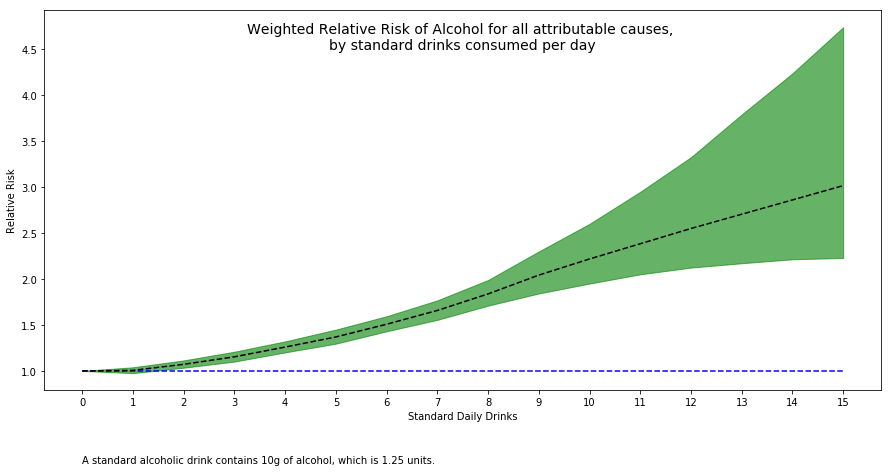

In [6]:
# Create figure and axes objects
fig, ax = plt.subplots(1,1,figsize=(15,7))

# Plot data
ax.plot(drinks, mean_rel_risk, linestyle='--', color='k');
ax.fill_between(drinks, lower_rel_risk, upper_rel_risk, alpha=0.6, color='g');
ax.hlines(1, 0, 15, linestyle='--', color='b');
ax.set_xticks(drinks);
ax.set_xlabel('Standard Daily Drinks');
ax.set_ylabel('Relative Risk');
ax.set_title('Weighted Relative Risk of Alcohol for all attributable causes, \nby standard drinks consumed per day', y=0.88, fontsize=14);

ax.text(0,0,'A standard alcoholic drink contains 10g of alcohol, which is 1.25 units.');

## What Does This Mean??

We have already established that our relative risk of drinking 1 drink per day is 0.57% higher than drinking no drinks.

### What is our baseline risk? 

The authors originally neglected to yield information about the absolute risks, meaning we have no way of actually identifying what our risk is relative to...  

Fortunately this was spotted by the Lancet press office who pressed for these numbers.

### Absolute Volumes

The number of alcohol related health problems analysed was 23.  
The paper concentrated on the prevalence of developing one of the 23 related health problems.  
The baseline reported that in one year 914 15-95 year olds would develop one of the 23 related health problems for every 100,000 people that drank no alcohol per day.

Lets add this to our dataframe

In [7]:
baseline = 914
div_by_10['Absolute'] = div_by_10.mean_all_cause_rr.apply(lambda x: int(x * baseline)) # convert to int (can't get fraction of a person)
div_by_10['AdditionalDrinkers'] = div_by_10.Absolute - baseline

In [8]:
div_by_10

,grams_per_day,mean_all_cause_rr,lower_all_cause_rr,upper_all_cause_rr,Absolute,AdditionalDrinkers
0,0,1.000000,1.000000,1.000000,914,0
1,10,1.005688,0.975214,1.039147,919,5
2,20,1.071426,1.034272,1.114190,979,65
3,30,1.153032,1.100884,1.208753,1053,139
4,40,1.259285,1.201090,1.321108,1150,236
5,50,1.369045,1.296137,1.449201,1251,337
6,60,1.507353,1.430419,1.594541,1377,463
7,70,1.657298,1.554894,1.767206,1514,600
8,80,1.837290,1.709607,1.988489,1679,765
9,90,2.041925,1.842062,2.299187,1866,952


### One Drink A Day

The affect of drinking one drink a day (1.25 UK units) is that 5 extra people in 100,000 will contract an adverse alcohol related health condition.

### Perspective

This means for 5 people to experience an adverse health condition, 100,000 people need to drink 1 drink per day (10g), 3.65kg per year each.

### One persons contribution

The formula for calculating g of alcohol is given by:

$g = V * (ABV / 100) * 0.8$

Where v = volume of beverage and ABV = alcohol by volume  
Multiplying by 0.8 is equivalent to dividing by 1.25  

### Bottle of Wine

$g = 750 * (12.5 / 100) * 0.8$  
$g = 75$

### Bottles of wine per year

In [9]:
ans = 3650 / 75
print(ans)

# We need 100,000 people to contribute

print(f'We need 100,000 people to drink {round(ans * 100000,0):,} bottles per year')

48.666666666666664
We need 100,000 people to drink 4,866,667.0 bottles per year


### Health Problem

This means nearly 4.87 million bottles of wine need to be consumed to experience 5 extra health problems or 973,333 bottles for 1 extra health problem.

### Final Thoughts on Relative Risk of Alcohol?

# Investigate Relationship Between Alcohol Consumption and GDP PPP

##### Source Data
Alcohol consumption data comes from the Lancet research paper: https://data.mendeley.com/datasets/5thy2mcwn7/1  
GDP Purchasing Power Parity Data comes from the World Bank: https://data.worldbank.org/indicator/NY.GDP.PCAP.PP.CD

I have cleaned the World Bank data slightly by transporting it from an xlsx file into a csv file and only keeping the relevant year (2016).  

##### Read in the datasets

In [10]:
df_alcohol = pd.read_csv('data/alcohol_consumption.csv')
df_ppp = pd.read_csv('data/WorldBankPPP.csv')
df_alcohol.head()
df_ppp.head()

,location_name,year_id,sex,age_group,mean_drinks_per_day
0,Cambodia,2016,Female,age-standardised,1.59
1,Canada,2016,Female,age-standardised,2.45
2,United States,2016,Female,age-standardised,1.78
3,Antigua and Barbuda,2016,Female,age-standardised,0.62
4,The Bahamas,2016,Female,age-standardised,1.01


,Country Name,Country Code,2016
0,afghanistan,AFG,1944.117005
1,angola,AGO,6440.990242
2,albania,ALB,11559.300840
3,arab world,ARB,16716.546900
4,united arab emirates,ARE,73017.480010


##### Pivot the alcohol consumption data so we have separate Female and Male columns.

In [11]:
df_alcohol = df_alcohol.pivot(index='location_name', columns='sex', values='mean_drinks_per_day').reset_index()

##### Drop Empty Values from the PPP data and then put country names into lowercase

In [12]:
# Drop NaN values
df_ppp = df_ppp.dropna(how='any')
# Convert Country names to lower case to increase chance of matching
df_alcohol.location_name = df_alcohol.location_name.str.lower()
df_ppp['Country Name'] = df_ppp['Country Name'].str.lower()

##### Merge the two dataframes on country name to match up GDP PPP and Mean Alcohol consumption

In [13]:
# Merge two dataframes together to join our PPP values and Alcohol Consumption Values
df_merged = df_alcohol.merge(df_ppp, left_on='location_name', right_on='Country Name', how='inner')

df_merged.head()

,location_name,Female,Male,Country Name,Country Code,2016
0,afghanistan,0.10,0.11,afghanistan,AFG,1944.117005
1,albania,1.09,2.52,albania,ALB,11559.300840
2,algeria,0.28,0.30,algeria,DZA,15013.296380
3,angola,1.21,1.67,angola,AGO,6440.990242
4,antigua and barbuda,0.62,1.32,antigua and barbuda,ATG,22661.488540


### Linear Regression

Build a linear regression model to investigate if a countries GDP can explain variance in alcohol consumption. 

Create X (independant) and Y (dependant) variables from the dataframe.

In [14]:
from scipy import stats

# Build a model for Male drinkers
x_m = df_merged['2016'].values
y_m = df_merged['Male'].values

slope_m, intercept_m, r_value_m, _, _ = stats.linregress(x_m, y_m)

# Repeat for Female
x_f = df_merged['2016'].values
y_f = df_merged['Female'].values

slope_f, intercept_f, r_value_f, _, _ = stats.linregress(x_f, y_f)

In [15]:
def plot_figure(ax, x, y, slope, intercept, r_value, title):
    
    ax.scatter(x, y, color='b', marker='x');
    ax.plot(x, intercept + x * slope, color='r', label='R squared: {:.2f}'.format(r_value));
    ax.set_xlabel('GDP PPP');
    ax.set_ylabel('Mean Alcohol Consumption');
    ax.set_title(title);
    ax.legend(loc='best');
    
    return ax

#### Plot our results

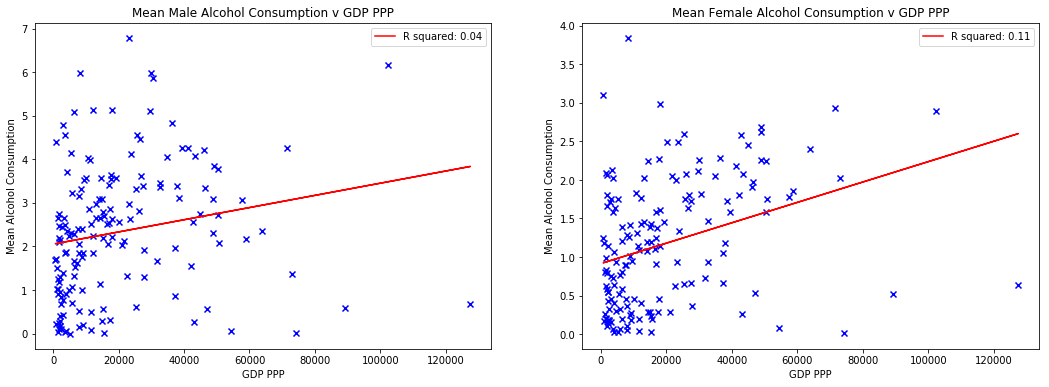

In [16]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(18,6))

ax = plot_figure(ax, x_m, y_m, slope_m, intercept_m, r_value_m**2, 'Mean Male Alcohol Consumption v GDP PPP')
ax2 = plot_figure(ax2, x_f, y_f, slope_f, intercept_f, r_value_f**2, 'Mean Female Alcohol Consumption v GDP PPP')

## Conclusion

We can see quite clearly that both relationships are quite weak. Both plots demonstrate a positive correlation between alcohol consumption and GDP which meets expectations. It seems reasonable to assume that highger economic wealth would translate into higher consumption. There is clearly a lot of information missing which could help us explain the variance between the various countries mean alcohol consumption. Inevitably there will be a host of difficult to capture variables such as the legal framework of a country, it's culture, religion or it's general attitude towards alcohol.